In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def kmeans(X_train, y_train, X_test):
    n_clusters = len(np.unique(y_train))
    clf = KMeans(n_clusters=n_clusters, random_state=42)
    clf.fit(X_train)
    y_labels_train = clf.labels_

    predictions = clf.predict(X_test)
    return predictions, clf

In [ ]:
train_df = pd.read_csv("/content/train_dataset.csv", index_col=0)

In [ ]:
train_df.shape

(1373, 20063)

In [ ]:
train_df.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,pk,label
sample_0,0.000000,0.003315,286.806543,0.361393,0.015630,1.294173,0.013211,3.822492,2.021886,0.003013,...,0.383805,0.819777,2.410966,0.642145,2.318633,36.140884,1.203536,5.929064,2.905203,brest_type3
sample_1,0.000000,0.567202,7.789265,0.021164,0.014261,0.924770,0.000000,7.299333,3.915060,0.012339,...,0.222345,0.898991,1.640520,0.007198,0.919862,30.493200,2.641067,2.125578,4.611629,colorectal
sample_2,0.000000,0.004089,30.511434,0.776527,0.055356,0.409060,0.014854,12.411614,3.980672,0.000000,...,1.515553,2.083028,5.803129,0.041532,3.622397,16.692205,5.847020,2.405141,2.138272,brain_type3
sample_3,0.000493,0.594456,40.468601,31.879005,0.028264,6.631189,1.323664,3.258789,2.820698,0.663213,...,0.560501,1.699614,4.091271,0.061599,3.147373,37.498130,4.962283,3.977622,2.474085,esophageal
sample_4,0.014751,0.009250,79.082795,0.091695,0.194962,0.521261,0.006163,16.207265,3.209522,0.001233,...,0.640069,1.924771,2.706393,0.088561,4.198640,86.959240,3.992847,4.332812,2.188873,brain_type1


In [ ]:
y = train_df['label']

In [ ]:
X = train_df.drop('label', axis=1)

In [ ]:
X.rank(axis=0)

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
sample_0,382.0,368.0,1362.0,572.0,725.0,620.0,774.0,92.0,212.0,292.0,...,1229.0,447.0,201.0,790.0,1163.0,700.0,735.0,196.0,1309.0,616.0
sample_1,382.0,1128.0,18.0,68.0,685.0,369.0,64.5,811.0,756.0,560.0,...,1074.0,115.0,295.0,281.0,10.0,59.0,555.0,826.0,438.0,920.0
sample_2,382.0,486.0,359.0,824.0,1162.0,22.0,827.0,1328.0,777.0,106.0,...,275.0,1346.0,1250.0,1345.0,607.0,1096.0,75.0,1349.0,566.0,433.0
sample_3,785.0,1132.0,574.0,1364.0,969.0,1320.0,1325.0,32.0,475.0,1232.0,...,776.0,769.0,1015.0,1245.0,707.0,996.0,793.0,1320.0,1124.0,522.0
sample_4,1179.0,892.0,1015.0,298.0,1355.0,74.0,480.0,1369.0,599.0,243.0,...,1119.0,908.0,1177.0,918.0,768.0,1207.0,1289.0,1233.0,1171.0,445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_1368,1130.0,137.0,914.0,661.0,1176.0,367.0,660.0,1194.0,529.0,381.0,...,470.0,1362.0,1323.0,1332.0,319.0,1156.0,57.0,1341.0,558.0,460.0
sample_1369,382.0,1127.0,25.0,171.0,250.0,267.0,238.0,1358.0,1291.0,1270.0,...,1336.0,22.0,91.0,207.0,123.0,133.0,649.0,664.0,289.0,831.0
sample_1370,1166.0,1369.0,1062.0,398.0,1214.0,568.0,1144.0,715.0,1055.0,1152.0,...,969.0,955.0,1019.0,1343.0,851.0,944.0,244.0,822.0,1187.0,1094.0
sample_1371,382.0,315.0,971.0,740.0,394.0,1067.0,1000.0,168.0,1232.0,308.0,...,1182.0,143.0,117.0,446.0,940.0,185.0,785.0,99.0,135.0,434.0


In [ ]:
y.rank(axis=0)

sample_0       1362.0
sample_1         18.0
sample_2        359.0
sample_3        574.0
sample_4       1015.0
                ...  
sample_1368     914.0
sample_1369      25.0
sample_1370    1062.0
sample_1371     971.0
sample_1372     648.0
Name: A2M, Length: 1373, dtype: float64

In [ ]:
missing_values = X.isnull().sum()

# выводим статистику по пропущенным значениям
print(missing_values)

A1BG       0
A1CF       0
A2M        0
A2ML1      0
A3GALT2    0
          ..
ZYG11B     0
ZYX        0
ZZEF1      0
ZZZ3       0
pk         0
Length: 20062, dtype: int64


In [ ]:
missing_values = y.isnull().sum()

# выводим статистику по пропущенным значениям
print(missing_values)

0


In [ ]:
# заменяем пропущенные значения в df на среднее значение столбца
X.fillna(X.sum(), inplace=True)

In [ ]:
X

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
sample_0,0.000000,0.003315,286.806543,0.361393,0.015630,1.294173,0.013211,3.822492,2.021886,0.003013,...,12.853943,0.383805,0.819777,2.410966,0.642145,2.318633,36.140884,1.203536,5.929064,2.905203
sample_1,0.000000,0.567202,7.789265,0.021164,0.014261,0.924770,0.000000,7.299333,3.915060,0.012339,...,10.166375,0.222345,0.898991,1.640520,0.007198,0.919862,30.493200,2.641067,2.125578,4.611629
sample_2,0.000000,0.004089,30.511434,0.776527,0.055356,0.409060,0.014854,12.411614,3.980672,0.000000,...,1.941802,1.515553,2.083028,5.803129,0.041532,3.622397,16.692205,5.847020,2.405141,2.138272
sample_3,0.000493,0.594456,40.468601,31.879005,0.028264,6.631189,1.323664,3.258789,2.820698,0.663213,...,6.565087,0.560501,1.699614,4.091271,0.061599,3.147373,37.498130,4.962283,3.977622,2.474085
sample_4,0.014751,0.009250,79.082795,0.091695,0.194962,0.521261,0.006163,16.207265,3.209522,0.001233,...,10.924203,0.640069,1.924771,2.706393,0.088561,4.198640,86.959240,3.992847,4.332812,2.188873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_1368,0.012101,0.001909,66.261429,0.491642,0.059123,0.922055,0.010063,9.934676,2.948213,0.005477,...,3.535790,1.692692,2.432612,5.285702,0.025408,4.004423,16.163613,5.507492,2.378793,2.230151
sample_1369,0.000000,0.566903,8.445775,0.037091,0.002997,0.803145,0.002374,14.716689,8.172767,1.270566,...,20.083763,0.112124,0.659652,1.498277,0.015831,1.099468,33.447663,2.282060,1.807627,4.049905
sample_1370,0.013900,6.915431,84.986527,0.165979,0.068235,1.185511,0.037944,6.720168,5.251892,0.315039,...,8.851841,0.668764,1.705605,5.731973,0.189414,2.952599,21.918918,2.636491,4.471099,6.289780
sample_1371,0.000000,0.003025,73.514210,0.591297,0.006300,2.794581,0.022753,4.290346,7.023546,0.003552,...,11.956612,0.242239,0.717274,1.889027,0.289418,1.207166,37.340425,0.985932,1.364461,2.141025


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

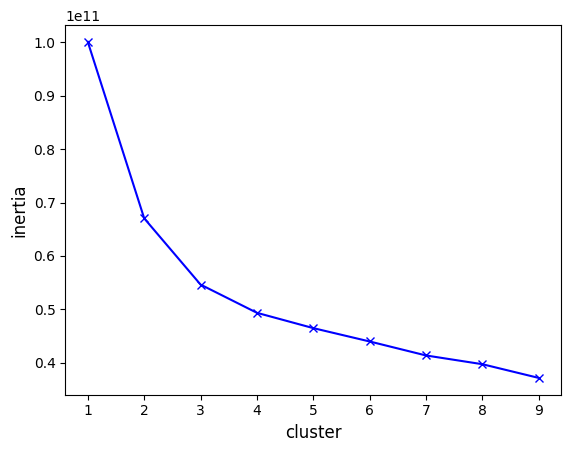

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

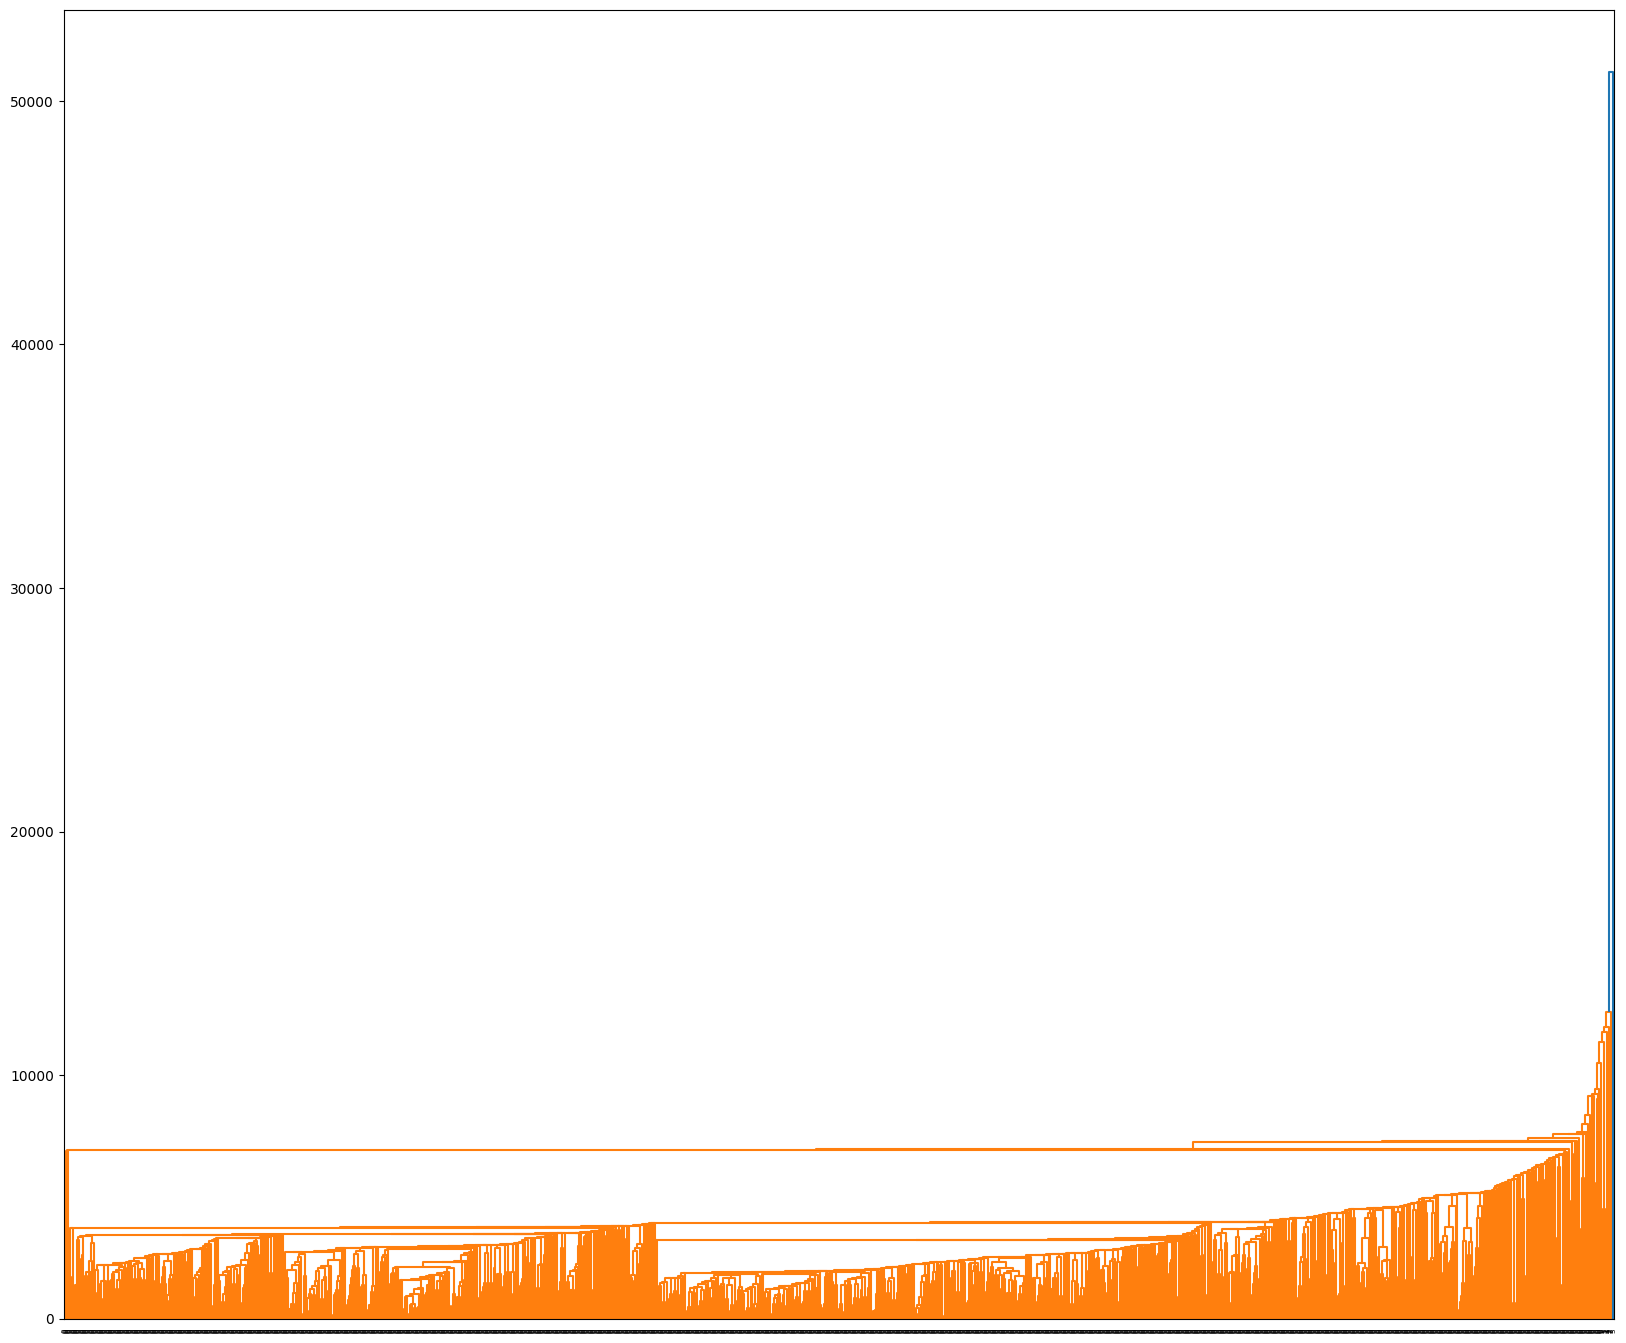

In [ ]:
# импортируем агломеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(X)

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# рассчитаем расстояния между кластерами
linked = linkage(X, 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

In [ ]:
X_train = X
y_train = y

In [ ]:
# Инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# Запустим обучение модели
kmeans.fit(X_train)

# Предскажем, к какому кластеру принадлежат покемоны
predictions = kmeans.predict(X_train)
# Если нам нужны метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

In [ ]:
test_df = pd.read_csv("test_dataset.csv", index_col=0)

In [ ]:
test_df.shape

(2068, 20062)

In [ ]:
test_df.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
sample_1373,0.000000,0.003673,41.020482,48.040614,0.005728,1.101273,0.006207,2.952525,2.013332,0.009258,...,8.394765,0.684099,1.931059,1.868612,0.685390,2.039283,27.475545,2.164179,2.315137,1.899831
sample_1374,0.000000,3.469063,9.783675,0.866523,0.047050,0.295475,0.183631,6.573744,4.310685,7.629612,...,10.489109,0.361212,1.166370,3.382316,0.200316,1.751362,37.142589,3.318575,2.155662,2.456186
sample_1375,0.000000,2.448347,11.422549,0.025506,0.007574,1.104860,0.008057,9.579848,5.691768,0.149097,...,12.140357,0.470669,1.365520,2.756178,0.018359,0.917897,25.911441,1.358383,1.698680,13.080951
sample_1376,0.004234,0.234344,118.675995,0.369411,0.155857,1.937780,12.878249,5.198446,2.517116,2.859899,...,5.863994,0.374877,1.340606,2.051798,0.343269,2.227607,40.116597,1.975397,2.774969,8.054335
sample_1377,0.000000,1.097162,16.292845,0.044874,0.000000,1.059236,0.016333,8.242265,3.099946,0.442786,...,7.025685,0.717334,2.023561,2.667771,0.030445,1.559961,39.017614,2.208302,2.244879,10.265742


In [ ]:
label_mapping = {k: num for num, k in enumerate(train_df["label"].unique())}

In [ ]:
label_mapping

{'brest_type3': 0,
 'colorectal': 1,
 'brain_type3': 2,
 'esophageal': 3,
 'brain_type1': 4,
 'brest_type1': 5,
 'brain_type2': 6,
 'brest_type2': 7}

In [ ]:
def kmeans(X_train, y_train, X_test):
    n_clusters = len(np.unique(y_train))
    clf = KMeans(n_clusters=n_clusters, random_state=42)
    clf.fit(X_train)
    y_labels_train = clf.labels_

    predictions = clf.predict(X_test)
    return predictions, clf

In [ ]:
predictions, clf = kmeans(
    X_train = X_train,
    y_train = y_train,
    X_test=test_df,
)

In [ ]:
predictions_df = pd.DataFrame(
    data=predictions, index=test_df.index, columns=["Predicted"]
)

In [ ]:
predictions_df.head()

In [ ]:
predictions_df.index.name = "Id"

In [ ]:
predictions_df.head()

In [ ]:
predictions_df["Predicted"].map({v: k for k, v in label_mapping.items()})

In [ ]:
predictions_df["Predicted"] = predictions_df["Predicted"].map(
    {v: k for k, v in label_mapping.items()}
)

In [ ]:
predictions_df.to_csv("submission_cluster.csv")